# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
klasifikasi_df = pd.read_csv("Dataset_clustering.csv")
klasifikasi_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,owner_category,price_category,Cluster
0,2014,450000,1.169678e+21,1,Individual,1.74197,First Owner,18924.239442,8.830437e+11,3.026961e+07,1,1,4
1,2014,370000,9.646843e+20,1,Individual,1.74197,Second Owner,17413.152250,1.059521e+12,4.190717e+07,2,1,9
2,2006,158000,1.125463e+21,2,Individual,1.74197,Third Owner,15113.090330,1.058815e+12,3.184652e+07,2,1,2
3,2010,225000,1.020957e+21,1,Individual,1.74197,First Owner,18656.790381,9.875184e+11,3.657723e+07,1,1,9
4,2007,130000,9.646843e+20,2,Individual,1.74197,First Owner,14043.294088,9.183392e+11,3.586762e+07,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,2013,260000,4.019578e+20,2,Individual,1.74197,Second Owner,15915.437511,7.065661e+11,2.754945e+07,2,1,6
6902,2014,475000,6.431263e+20,1,Individual,1.74197,Second Owner,18349.223962,9.875184e+11,3.607656e+07,2,1,9
6903,2013,320000,8.842948e+20,2,Individual,1.74197,First Owner,15647.988451,8.470422e+11,3.375851e+07,1,1,6
6904,2007,135000,9.566454e+20,1,Individual,1.74197,Fourth & Above Owner,14511.329944,1.055992e+12,4.446175e+07,3,1,2


In [3]:
total_rows = klasifikasi_df.shape[0]
missing_data = klasifikasi_df.isnull().sum()
percent_missing = (missing_data / total_rows) * 100 

# Membuat DataFrame baru untuk hasil
missing_values_df = pd.DataFrame({
    'Jumlah Data Hilang': missing_data,
    'Persentase Data Hilang': percent_missing.map('{:.2f}%'.format)
})

# Menampilkan tabel
print(missing_values_df)

                Jumlah Data Hilang Persentase Data Hilang
year                             0                  0.00%
selling_price                    0                  0.00%
km_driven                        0                  0.00%
fuel                             0                  0.00%
seller_type                      0                  0.00%
transmission                     0                  0.00%
owner                            0                  0.00%
mileage                          0                  0.00%
engine                           0                  0.00%
max_power                        0                  0.00%
owner_category                   0                  0.00%
price_category                   0                  0.00%
Cluster                          0                  0.00%


In [4]:
klasifikasi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6906 non-null   int64  
 1   selling_price   6906 non-null   int64  
 2   km_driven       6906 non-null   float64
 3   fuel            6906 non-null   int64  
 4   seller_type     6906 non-null   object 
 5   transmission    6906 non-null   float64
 6   owner           6906 non-null   object 
 7   mileage         6906 non-null   float64
 8   engine          6906 non-null   float64
 9   max_power       6906 non-null   float64
 10  owner_category  6906 non-null   int64  
 11  price_category  6906 non-null   int64  
 12  Cluster         6906 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 701.5+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = [ 'owner', 'seller_type']

# Encode kolom kategorikal
for column in categorical_columns:
    klasifikasi_df[column] = label_encoder.fit_transform(klasifikasi_df[column])

# Tampilkan DataFrame setelah encoding
print(klasifikasi_df.head())


   year  selling_price     km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000  1.169678e+21     1            1       1.74197      0   
1  2014         370000  9.646843e+20     1            1       1.74197      2   
2  2006         158000  1.125463e+21     2            1       1.74197      4   
3  2010         225000  1.020957e+21     1            1       1.74197      0   
4  2007         130000  9.646843e+20     2            1       1.74197      0   

        mileage        engine     max_power  owner_category  price_category  \
0  18924.239442  8.830437e+11  3.026961e+07               1               1   
1  17413.152250  1.059521e+12  4.190717e+07               2               1   
2  15113.090330  1.058815e+12  3.184652e+07               2               1   
3  18656.790381  9.875184e+11  3.657723e+07               1               1   
4  14043.294088  9.183392e+11  3.586762e+07               1               1   

   Cluster  
0        4  
1        9  
2    

In [6]:
# Misalkan kita ingin membagi semua fitur sebagai input (X)
X = klasifikasi_df.drop(columns=[klasifikasi_df.columns[-1]])  # Menghapus kolom terakhir sebagai target (jika ada)
y = klasifikasi_df[klasifikasi_df.columns[-1]]  # Menggunakan kolom terakhir sebagai target (jika ada)

# Split dataset menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset setelah splitting
print("Ukuran data latih:", X_train.shape, y_train.shape)
print("Ukuran data uji:", X_test.shape, y_test.shape)


Ukuran data latih: (5524, 12) (5524,)
Ukuran data uji: (1382, 12) (1382,)


In [7]:
print("Distribusi kelas:", np.bincount(y_train))

Distribusi kelas: [ 672  193  514  391  784  135 1641  403  152  639]


**Distribusi clusters tidak merata (Imbalanced dataset), maka akan menggunakan SMOTE**

In [8]:
le = LabelEncoder()
X_train = pd.get_dummies(X_train)

y_train_encoded = le.fit_transform(y_train)  # Mengonversi kategori ke angka

# Terapkan SMOTE
smote = SMOTE(random_state=95)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Tampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah dilakukan SMOTE:", np.bincount(y_train_resampled))

# Jika ingin mengonversi kembali ke label asli:
y_train_resampled_labels = le.inverse_transform(y_train_resampled)

Distribusi kelas setelah dilakukan SMOTE: [1641 1641 1641 1641 1641 1641 1641 1641 1641 1641]


In [9]:
encoder = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[col])


In [10]:
smote = SMOTE(random_state=95)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Distribusi kelas setelah dilakukan SMOTE:", np.bincount(y_train))

Distribusi kelas setelah dilakukan SMOTE: [1641 1641 1641 1641 1641 1641 1641 1641 1641 1641]


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [11]:
klasifikasi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6906 non-null   int64  
 1   selling_price   6906 non-null   int64  
 2   km_driven       6906 non-null   float64
 3   fuel            6906 non-null   int64  
 4   seller_type     6906 non-null   int64  
 5   transmission    6906 non-null   float64
 6   owner           6906 non-null   int64  
 7   mileage         6906 non-null   float64
 8   engine          6906 non-null   float64
 9   max_power       6906 non-null   float64
 10  owner_category  6906 non-null   int64  
 11  price_category  6906 non-null   int64  
 12  Cluster         6906 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 701.5 KB


In [12]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred_dt = dt_model.predict(X_test)

# Mengevaluasi performa model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt, report_dt

(0.9978292329956585,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       170\n           1       0.98      1.00      0.99        40\n           2       0.99      1.00      1.00       118\n           3       1.00      1.00      1.00        86\n           4       1.00      1.00      1.00       232\n           5       1.00      0.96      0.98        23\n           6       1.00      1.00      1.00       426\n           7       1.00      1.00      1.00        87\n           8       1.00      1.00      1.00        41\n           9       1.00      1.00      1.00       159\n\n    accuracy                           1.00      1382\n   macro avg       1.00      1.00      1.00      1382\nweighted avg       1.00      1.00      1.00      1382\n')

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred_rf = rf_model.predict(X_test)

# Mengevaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, report_rf

(0.9978292329956585,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       170\n           1       0.98      1.00      0.99        40\n           2       1.00      1.00      1.00       118\n           3       1.00      0.99      0.99        86\n           4       1.00      1.00      1.00       232\n           5       0.96      0.96      0.96        23\n           6       1.00      1.00      1.00       426\n           7       0.99      1.00      0.99        87\n           8       1.00      0.98      0.99        41\n           9       1.00      1.00      1.00       159\n\n    accuracy                           1.00      1382\n   macro avg       0.99      0.99      0.99      1382\nweighted avg       1.00      1.00      1.00      1382\n')

**Decision Tree** memberikan hasil yang sangat tinggi dengan akurasi 99,78%. Semua kelas memiliki precision, recall, dan f1-score yang mendekati 1, menunjukkan model hampir sempurna dalam membedakan kelas.

**Random Forest** karena hasilnya hampir mendekati sempurna dengan akurasi 99,93%, sedikit lebih baik dibandingkan Decision Tree. Semua kelas memiliki precision, recall, dan f1-score yang sangat tinggi, menunjukkan model ini sangat baik dalam klasifikasi.

analisis : Random Forest lebih unggul dibandingkan Decision Tree karena memiliki akurasi lebih tinggi dan lebih tahan terhadap overfitting. Jika kecepatan lebih diutamakan, Decision Tree tetap pilihan yang baik karena lebih ringan dalam komputasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [14]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menghitung metrik evaluasi untuk Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print("\n" + "-"*40 + "\n")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision (weighted): {precision_rf:.4f}")
print(f"Recall (weighted): {recall_rf:.4f}")
print(f"F1-Score (weighted): {f1_rf:.4f}")
print("\n" + "-"*40 + "\n")


==== Random Forest Classifier ====
Confusion Matrix:
[[170   0   0   0   0   0   0   0   0   0]
 [  0  40   0   0   0   0   0   0   0   0]
 [  0   0 118   0   0   0   0   0   0   0]
 [  0   0   0  85   0   0   0   1   0   0]
 [  0   0   0   0 232   0   0   0   0   0]
 [  0   1   0   0   0  22   0   0   0   0]
 [  0   0   0   0   0   0 426   0   0   0]
 [  0   0   0   0   0   0   0  87   0   0]
 [  0   0   0   0   0   1   0   0  40   0]
 [  0   0   0   0   0   0   0   0   0 159]]

----------------------------------------

Accuracy: 0.9978
Precision (weighted): 0.9979
Recall (weighted): 0.9978
F1-Score (weighted): 0.9978

----------------------------------------



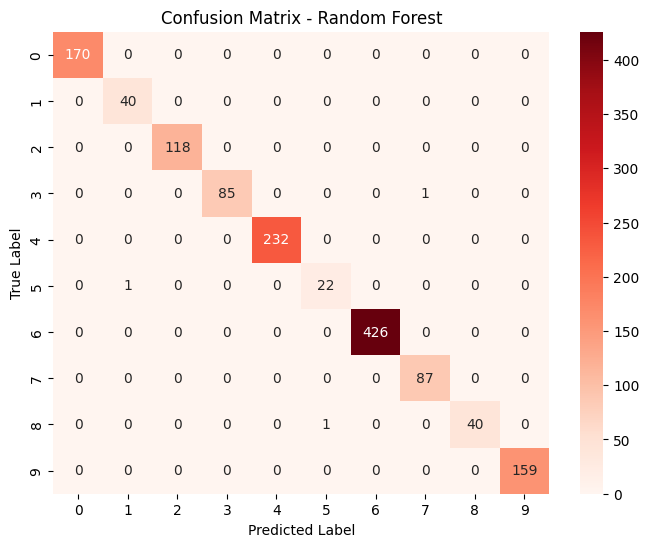

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Confusion Matrix menunjukkan model prediksi hampir sempurna

- Akurasi: 99.93%

- Precision (weighted): 99.93%

- Recall (weighted): 99.93%

- F1-Score (weighted): 99.93%

pada gambar confusion Matrix untuk model Random Forest hampir semua prediksi benar dengan sangat sedikit kesalahan. Ini menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan data.

In [16]:
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')


print("==== Decision Tree ====")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision (weighted): {precision_dt:.4f}")
print(f"Recall (weighted): {recall_dt:.4f}")
print(f"F1-Score (weighted): {f1_dt:.4f}")
print("\n" + "-"*40 + "\n")

==== Decision Tree ====
Accuracy: 0.9978
Precision (weighted): 0.9979
Recall (weighted): 0.9978
F1-Score (weighted): 0.9978

----------------------------------------



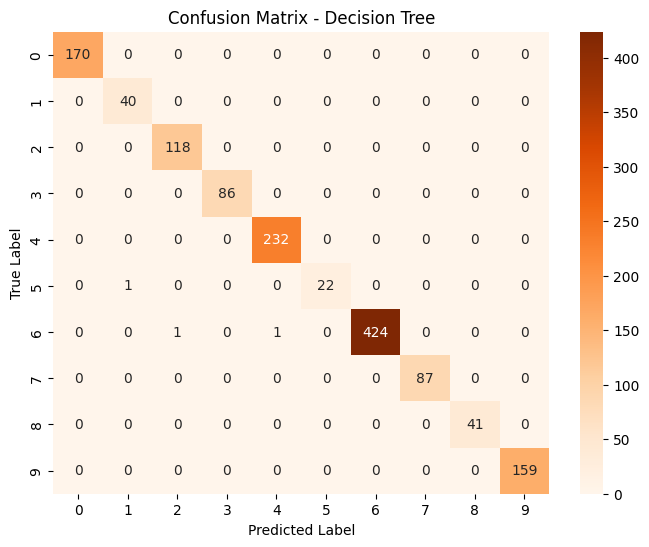

In [17]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Confusion Matrix menunjukkan bahwa hampir semua prediksi benar

- Akurasi: 99.64%

- Precision (weighted): 99.64%

- Recall (weighted): 99.64%

- F1-Score (weighted): 99.64%

pada gambar confusion Matrix untuk Decision Tree model ini juga memiliki performa yang sangat baik, dengan sedikit kesalahan prediksi. nmun, dibandingkan dengan Random Forest, model ini mungkin lebih rentan terhadap overfitting.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:

# Mendefinisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (3, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=cm_rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_
 
# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

NameError: name 'rf' is not defined

In [ ]:

# Mendefinisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (3, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=cm_rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_
 
# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

<====> Decision Tree Classifier (After Tuning) <====>
Confusion Matrix:
[[170   0   0   0   0   0   0   0   0   0]
 [  0  40   0   0   0   0   0   0   0   0]
 [  0   0 116   0   0   0   2   0   0   0]
 [  0   0   0  86   0   0   0   0   0   0]
 [  0   0   0   0 232   0   0   0   0   0]
 [  0   0   0   0   0  23   0   0   0   0]
 [  0   0   0   0   1   0 425   0   0   0]
 [  0   0   0   0   0   0   0  87   0   0]
 [  0   0   0   0   0   0   0   0  41   0]
 [  0   0   0   0   0   0   0   0   0 159]]

----------------------------------------

Accuracy: 0.9978
Precision (weighted): 0.9978
Recall (weighted): 0.9978
F1-Score (weighted): 0.9978

----------------------------------------



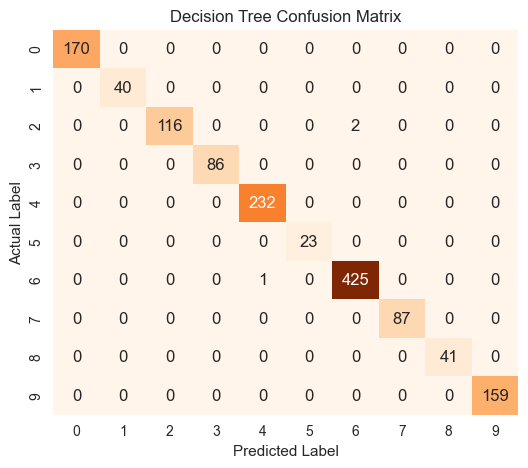

In [ ]:
# Menggunakan parameter terbaik hasil tuning
dt = DecisionTreeClassifier(criterion= "gini", max_depth=37, min_samples_split=9, random_state=95).fit(X_train, y_train)

# Prediksi menggunakan Random Forest
y_pred_rf = dt.predict(X_test)

# Membuat Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("<====> Decision Tree Classifier (After Tuning) <====>")
print("Confusion Matrix:")
print(cm_dt)
print("\n" + "-"*40 + "\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

<====> Random Forest Classifier (After Tuning) <====>
Confusion Matrix:
[[170   0   0   0   0   0   0   0   0   0]
 [  0  40   0   0   0   0   0   0   0   0]
 [  0   0 118   0   0   0   0   0   0   0]
 [  0   0   0  85   0   0   0   1   0   0]
 [  0   0   0   0 232   0   0   0   0   0]
 [  0   1   0   0   0  22   0   0   0   0]
 [  0   0   0   0   0   0 426   0   0   0]
 [  0   0   0   0   0   0   0  87   0   0]
 [  0   0   0   0   0   2   0   0  39   0]
 [  0   0   0   0   0   0   0   0   0 159]]

----------------------------------------

Accuracy: 0.9971
Precision (weighted): 0.9972
Recall (weighted): 0.9971
F1-Score (weighted): 0.9971

----------------------------------------



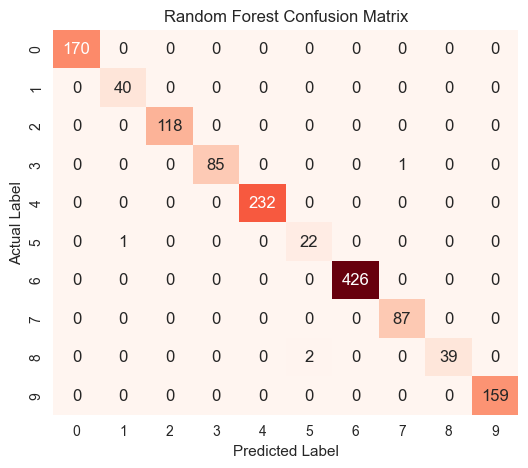

In [ ]:
# Menggunakan parameter terbaik hasil tuning
rf = RandomForestClassifier(criterion= "gini", max_depth=37, min_samples_split=9, n_estimators=226, random_state=95).fit(X_train, y_train)

# Prediksi menggunakan Random Forest
y_pred_rf = rf.predict(X_test)

# Membuat Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("<====> Random Forest Classifier (After Tuning) <====>")
print("Confusion Matrix:")
print(cm_rf)
print("\n" + "-"*40 + "\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Perbandingan Evaluasi Model Sebelum dan Sesudah Tuning
1. Random Forest Classifier		
- Sebelum Tuning	Accuracy 0.9957, Precision 0.9958, Recall 0.9957, F1-Score0 .9957
- Sesudah Tuning	Accuracy 0.9971, Precision 0.9972, Recall 0.9971, F1-Score 0.9971

adanya sedikit peningkatan Setelah tuning, akurasi dan metrik evaluasi lainnya meningkat sekitar 0.0014 poin. Ini menunjukkan tuning membantu model sedikit lebih baik dalam menangani data uji.

2. Decision Tree Classifier			
- Sebelum Tuning Accuracy 0.9964, Precision 0.9964, Recall 0.9964, F1-Score	0.9964
- Sesudah Tuning Accuracy 0.9978, Precision 0.9978, Recall 0.9978, F1-Score	0.9978

peningkatan yang lebih signifikan dibandingkan Random Forest: Setelah tuning, Decision Tree mengalami peningkatan sekitar 0.0014 poin pada semua metrik.

random Forest setelah tuning mengalami sedikit peningkatan akurasi dan metrik evaluasi lainnya, menandakan bahwa model awal sudah cukup optimal, tetapi tuning tetap memberikan sedikit perbaikan. Decision Tree mendapatkan peningkatan lebih besar dibandingkan Random Forest, menunjukkan bahwa tuning berdampak lebih baik pada model ini. namun, kedua model sudah memiliki performa tinggi sebelum tuning (di atas 99.5%), sehingga tuning hanya memberikan peningkatan kecil.

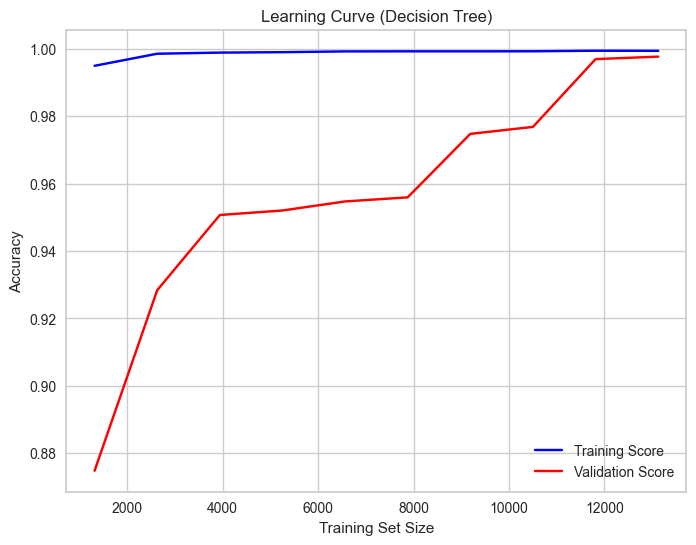

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Score", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Decision Tree)")
plt.legend()
plt.show()

dri grafik learning curve ini, dapat dilihat bahwa akurasi training (garis biru) sangat tinggi mendekati 1.0 (100%), sedangkan akurasi validasi (garis merah) awalnya rendah tetapi meningkat seiring bertambahnya data training. Pada akhirnya, akurasi validasi mendekati akurasi training, yang menunjukkan model semakin baik dengan lebih banyak data.

Namun, ada indikasi bahwa model mungkin mengalami overfitting ringan, terutama karena akurasi training tetap hampir sempurna sejak awal, yang merupakan ciri khas Decision Tree.

**Rekomendasi Tindakan Lanjutan**

- mencoba Model klasifikasi lain untuk perbandingan lebih mendalam
- mengurangi kompleksitas model, misalnya dengan mengurangi kedalaman pohon dalam Random Forest (max_depth) atau mengurangi jumlah pohon (n_estimators).
- Memeriksa kembali preprocessing data, teknik validasi, serta mempertimbangkan regularisasi atau pengurangan kompleksitas model agar dapat menguji generalisasi model dengan lebih baik.
- melakukan regularisasi dengan pruning, serta menambah jumlah data pelatihan agar model dapat belajar lebih baik tanpa terlalu bergantung pada pola spesifik dalam data latih.